# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
!pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [69]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Data Overview

- Observations
- Sanity checks

In [3]:
## Loading the dataset
df = pd.read_csv('C:/Users/samyu/Documents/PGP - DSBA/Unsupervised Learning/stock_data.csv')

In [4]:
# Observations and sanity checks
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.350,10.000,1.687,135,51,-604000000,7610000000,11.390,668129938.500,3.718,-8.784
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240,8.339,2.198,130,77,51000000,5144000000,3.150,1633015873.000,18.806,-8.750
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910,11.301,1.274,21,67,938000000,4423000000,2.940,1504421769.000,15.276,-0.394
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940,13.977,1.358,9,180,-240840000,629551000,1.260,499643650.800,74.556,4.200
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320,-1.828,1.701,14,272,315120000,696878000,0.310,2247993548.000,178.452,1.060


Most columns in the dataset seem to be numerical in nature.

In [5]:
df.shape

(340, 15)

There are 340 rows and 15 columns in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.000,NaN,NaN,NaN,80.862,98.055,4.500,38.555,59.705,92.880,1274.950
Price Change,340.000,NaN,NaN,NaN,4.078,12.006,-47.130,-0.939,4.820,10.695,55.052
Volatility,340.000,NaN,NaN,NaN,1.526,0.592,0.733,1.135,1.386,1.696,4.580
ROE,340.000,NaN,NaN,NaN,39.597,96.548,1.000,9.750,15.000,27.000,917.000
Cash Ratio,340.000,NaN,NaN,NaN,70.024,90.421,0.000,18.000,47.000,99.000,958.000
Net Cash Flow,340.000,NaN,NaN,NaN,55537620.588,1946365312.176,-11208000000.000,-193906500.000,2098000.000,169810750.000,20764000000.000


There are 11 economic sectors / industries based on which the stock data is collected. The data is collected for 340 securities in total.
The stock prices seem to fluctuate quite a bit with it's lowest price at 4.5 and the highest price at 1275. The lowest percentage change in stock price by 47% and the highest is by 55%.
The volatility in the stock price over the last 13 weeks has a mean of 1.526. The maximum earnings per share is 50.90.


In [9]:
#to check for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [10]:
#to check for duplicated values
df.duplicated().sum()

0

There are no missing values or duplicate values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [8]:
## Univariate Analysis

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
#function to create box plot and histograms

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

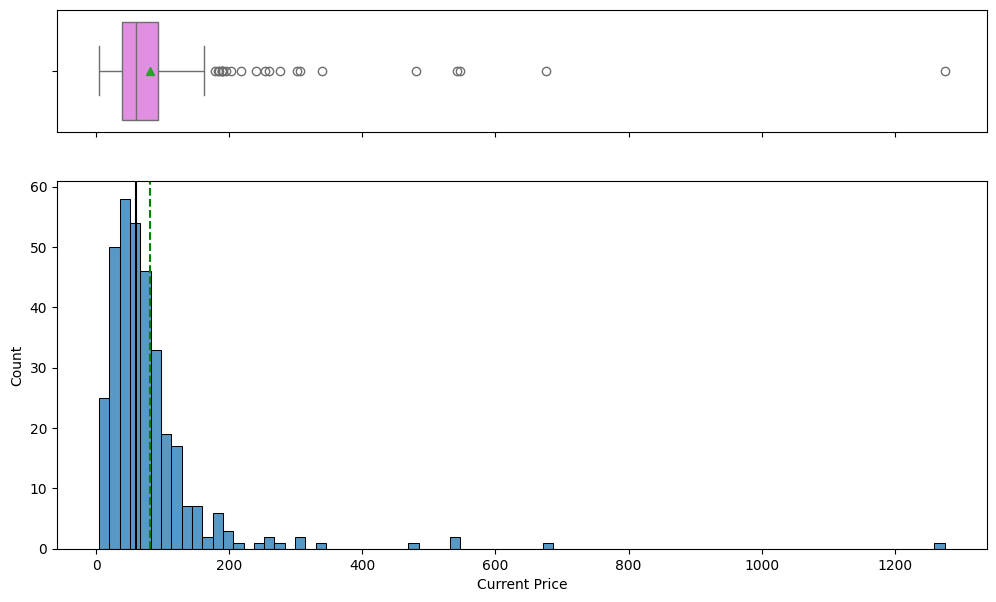

In [13]:
histogram_boxplot(df, 'Current Price')

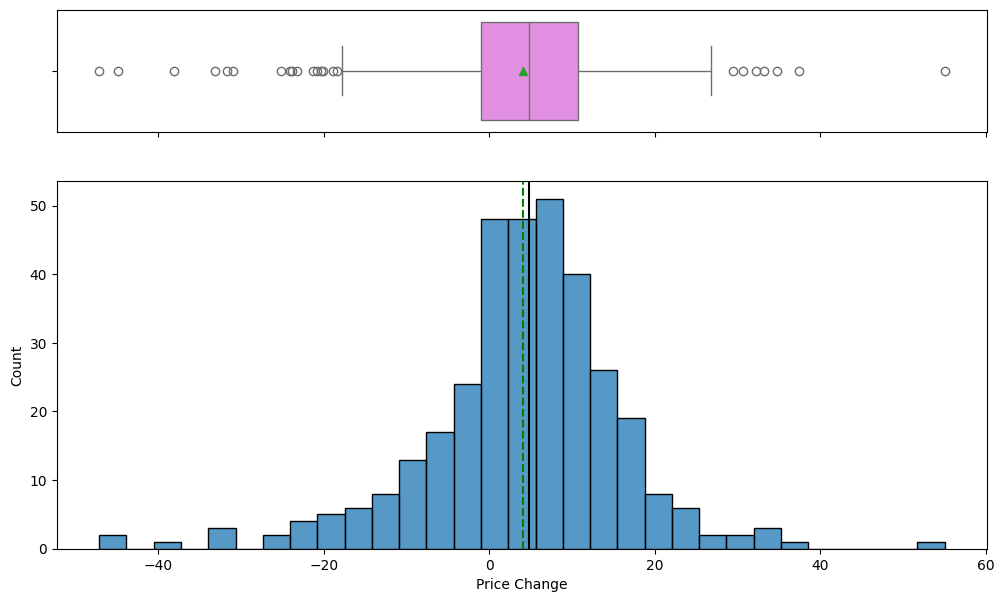

In [14]:
histogram_boxplot(df, 'Price Change')

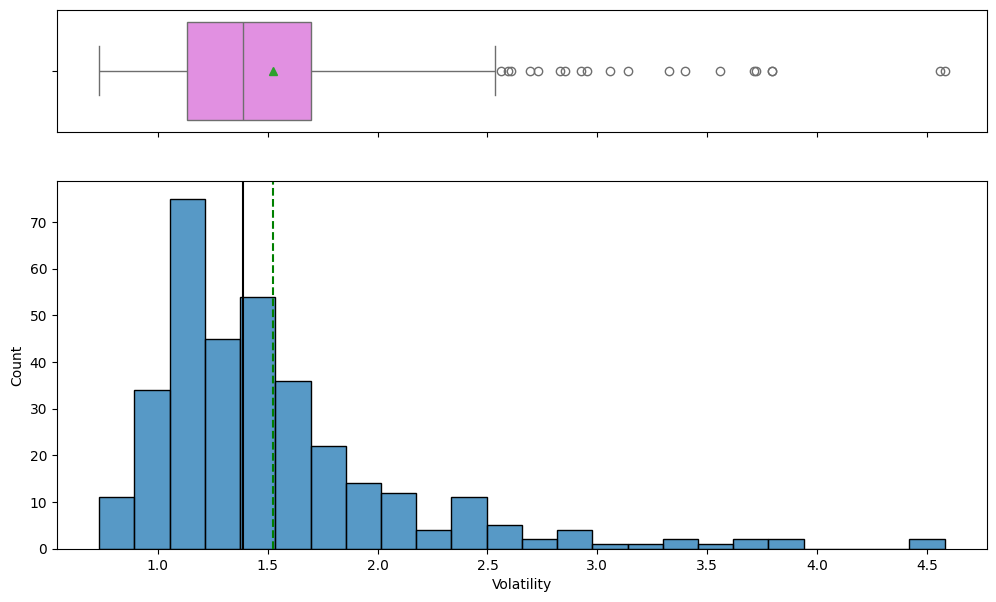

In [15]:
histogram_boxplot(df, 'Volatility')

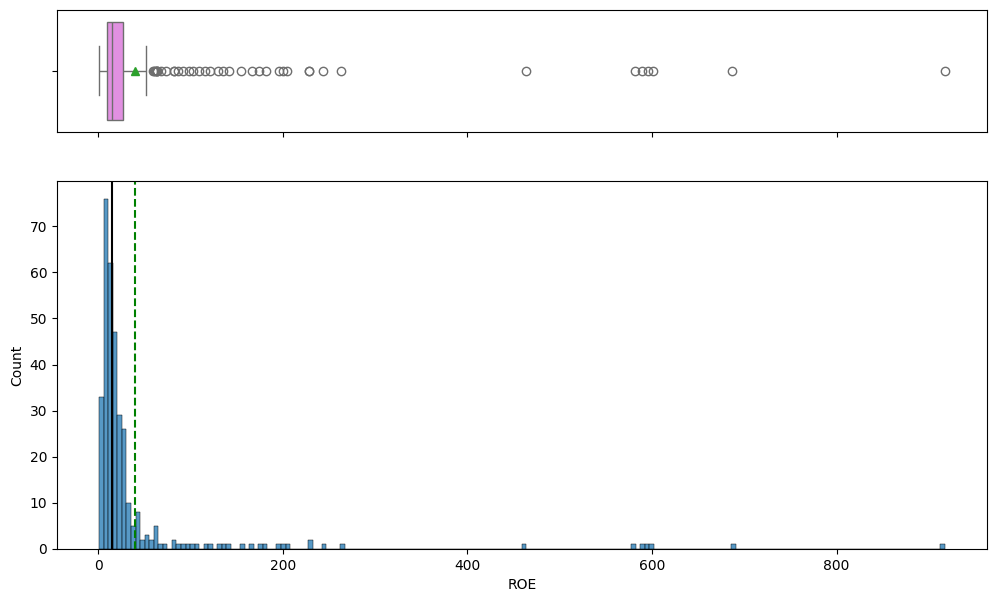

In [22]:
histogram_boxplot(df, 'ROE')

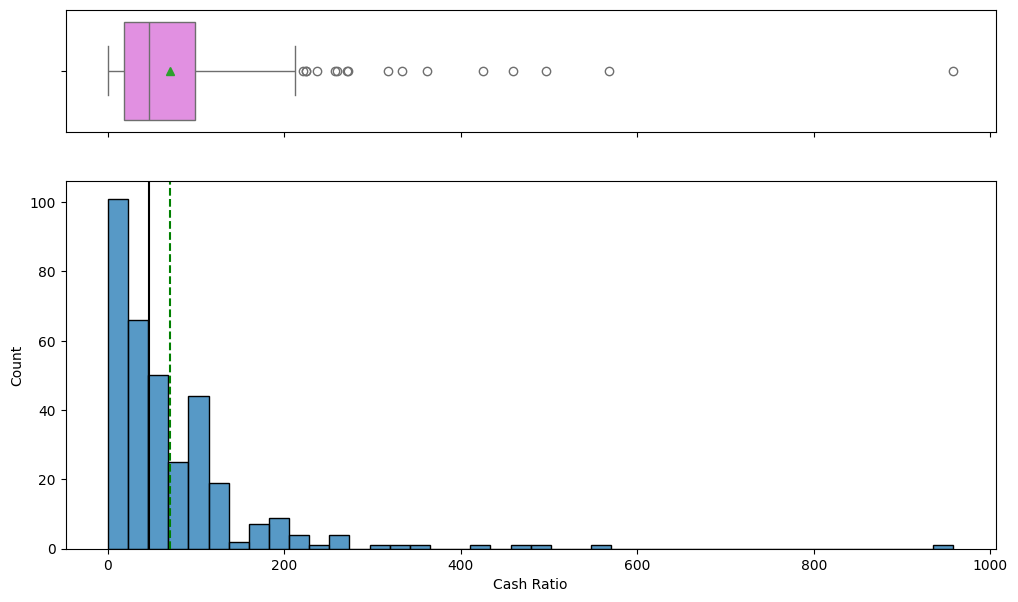

In [23]:
histogram_boxplot(df, 'Cash Ratio')

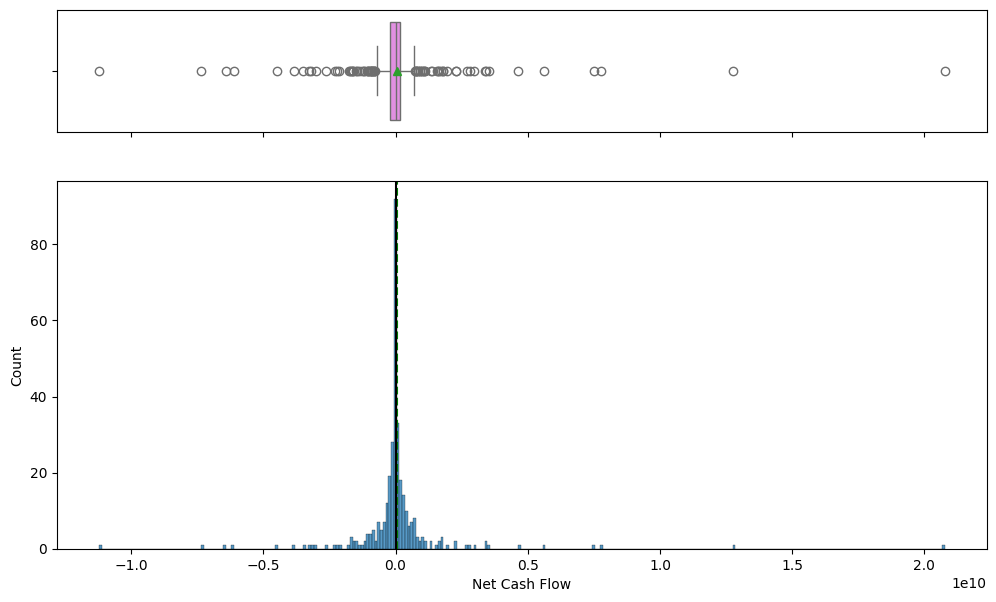

In [24]:
histogram_boxplot(df, 'Net Cash Flow')

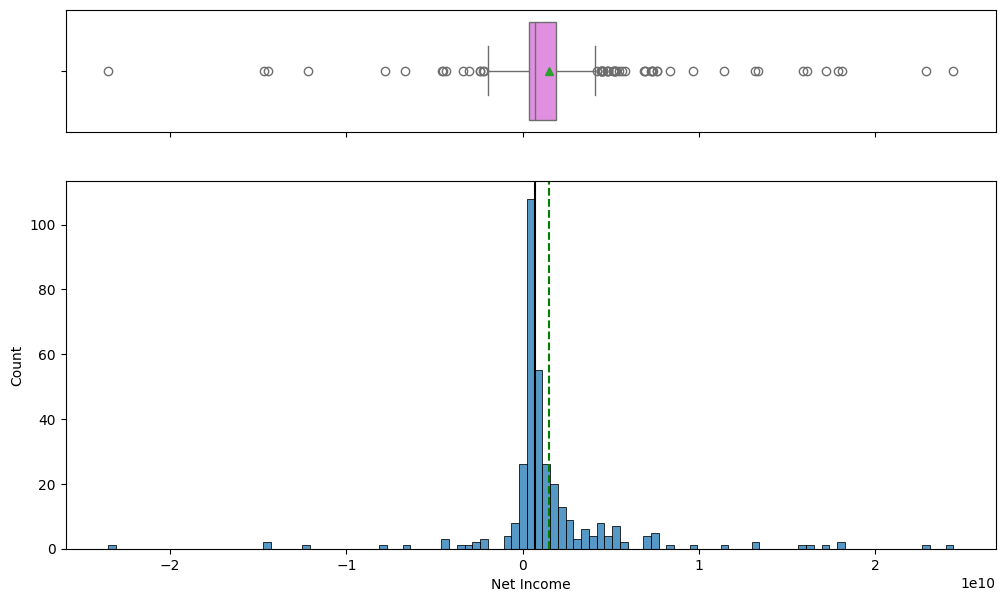

In [25]:
histogram_boxplot(df, 'Net Income')

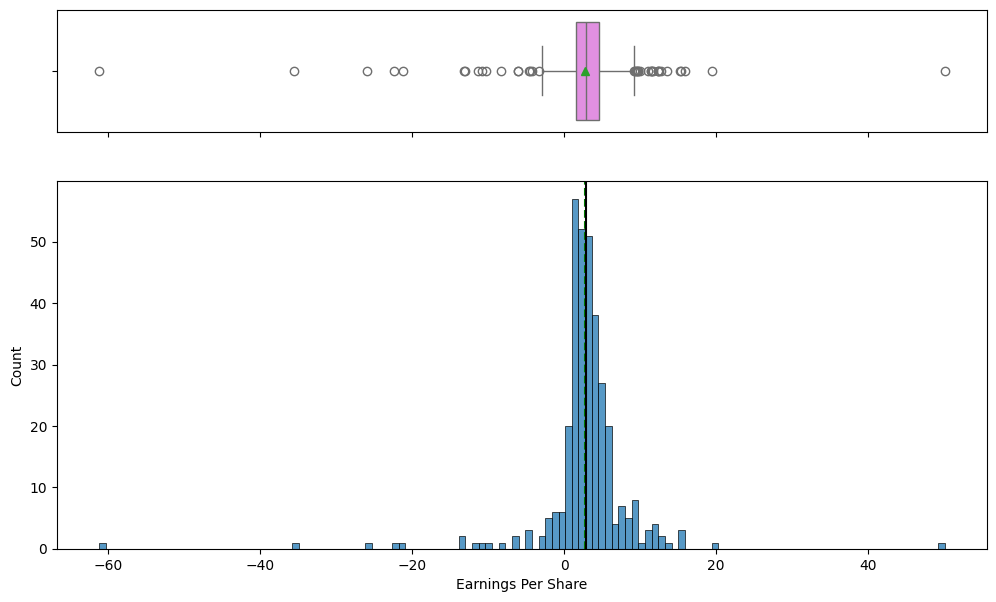

In [16]:
histogram_boxplot(df, 'Earnings Per Share')

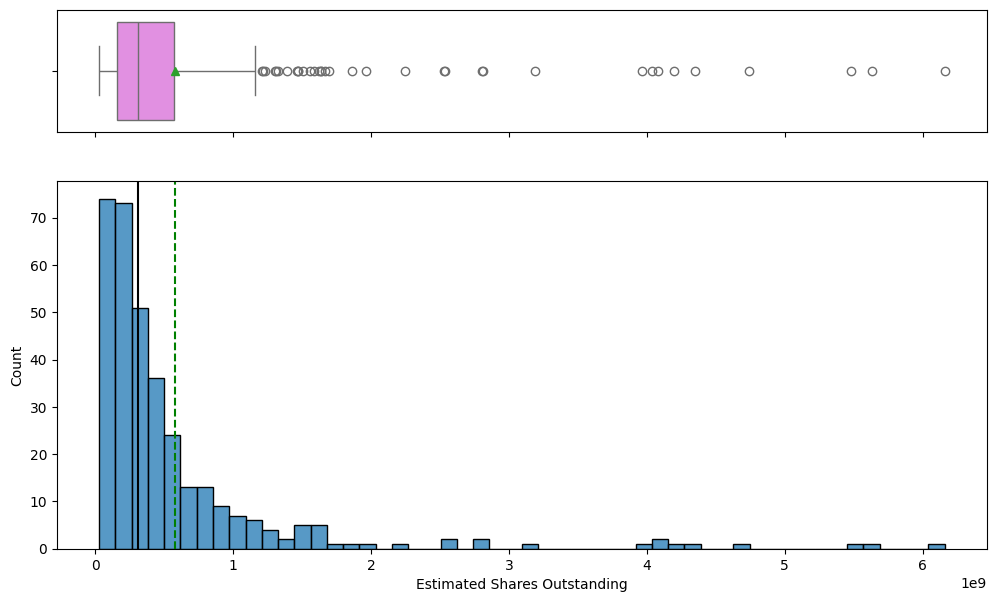

In [19]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

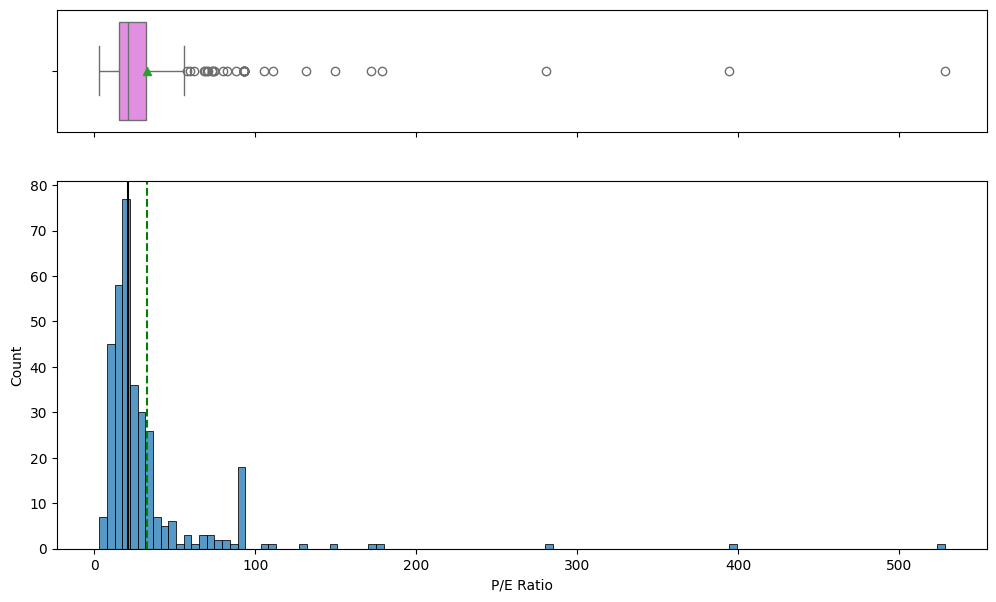

In [20]:
histogram_boxplot(df, 'P/E Ratio')

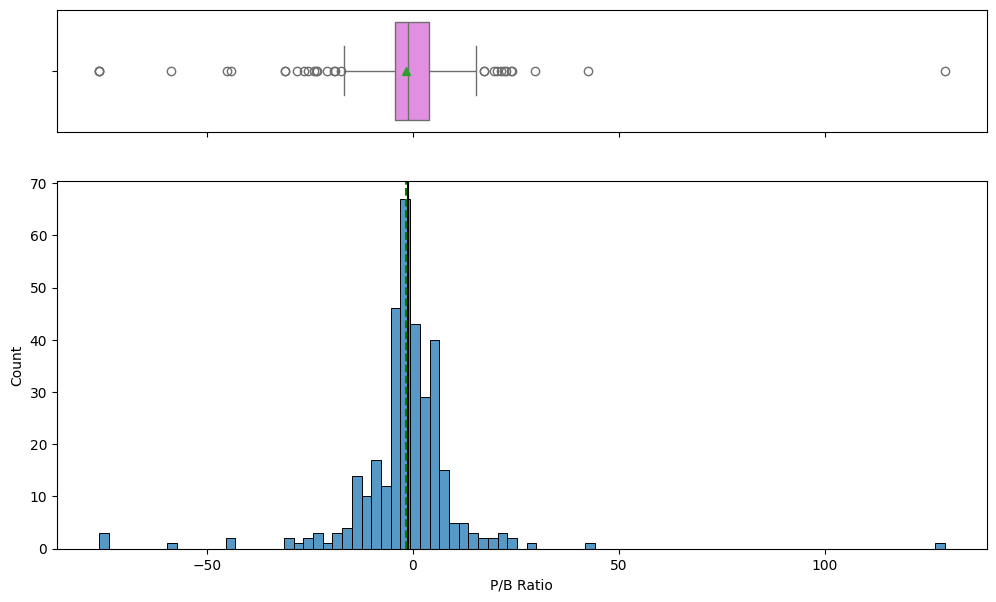

In [21]:
histogram_boxplot(df, 'P/B Ratio')

Almost all the variables seem to have outliers. But outliers will have an effect only while performing K-means clustering and will not have much impact on hierarchical clustering

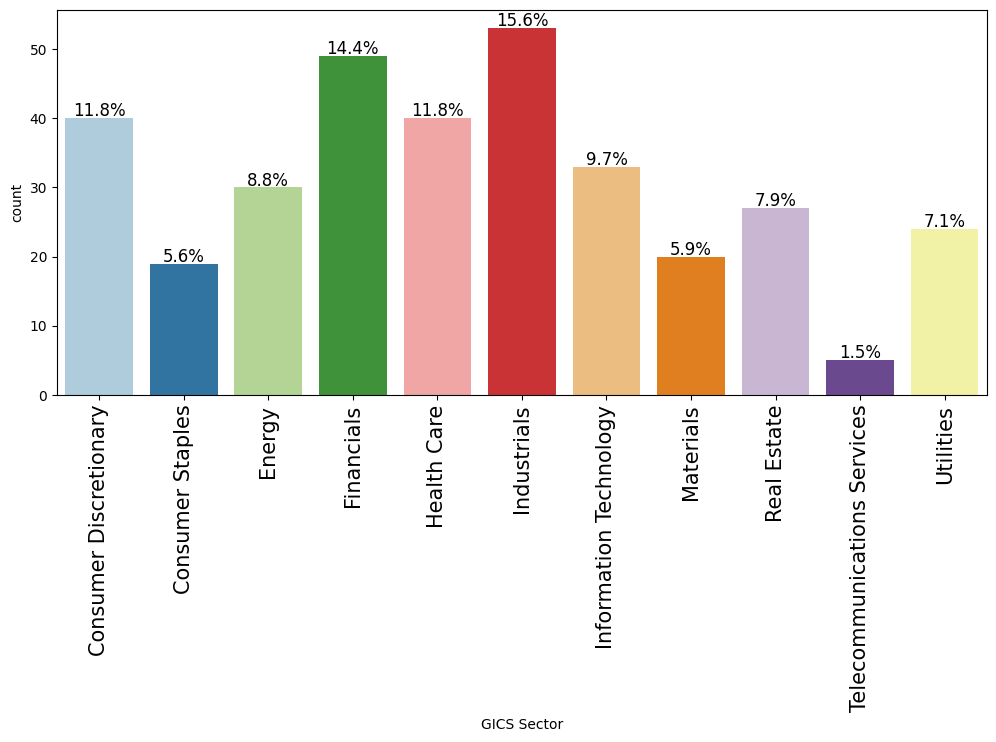

In [26]:
labeled_barplot(df, 'GICS Sector', perc=True)

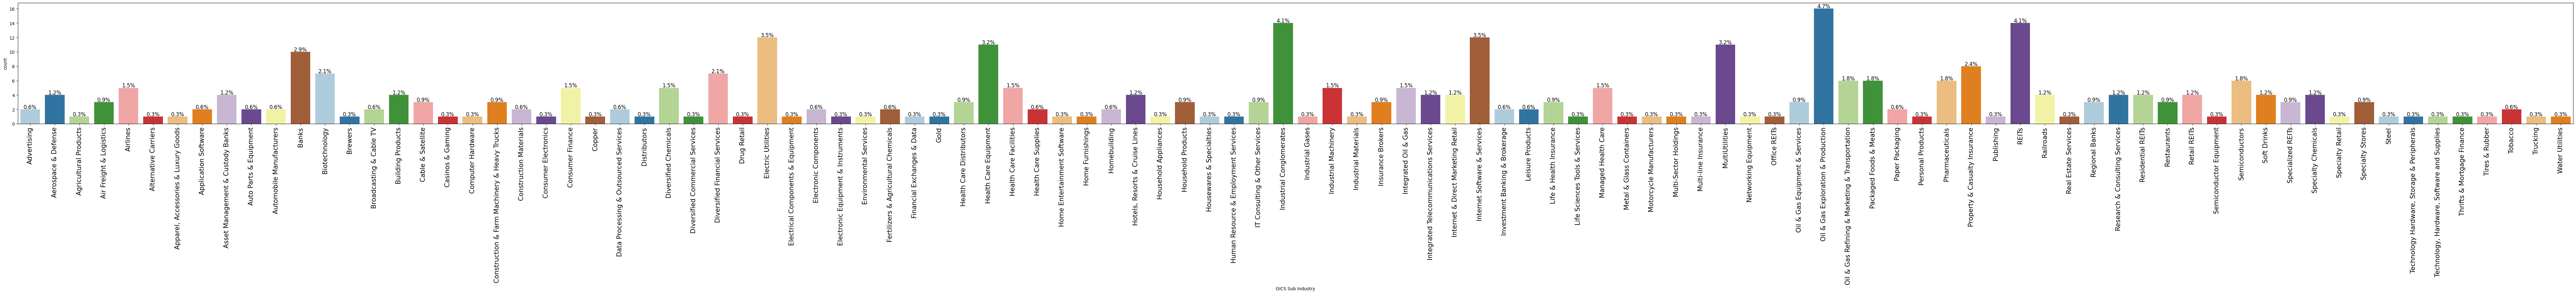

In [27]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

### BiVariate Analysis

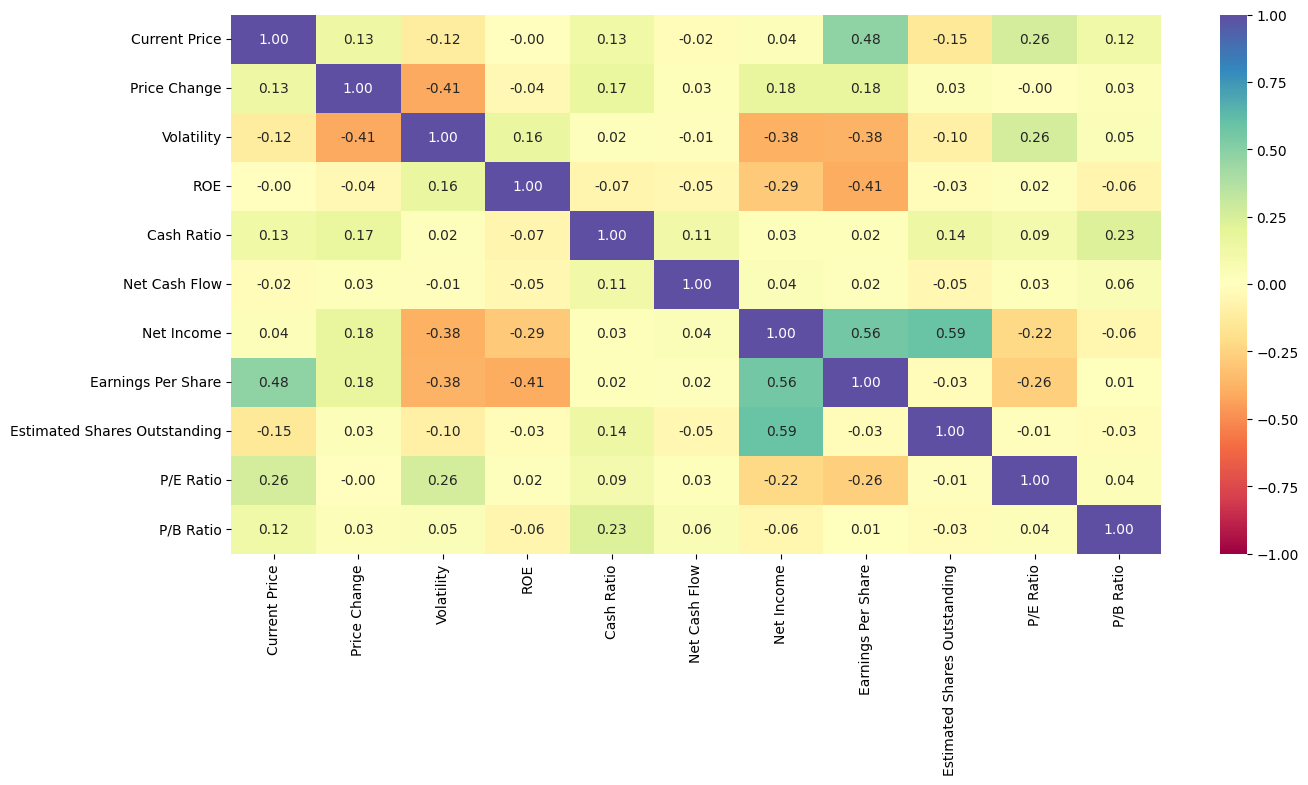

In [28]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There does not seem to be a strong correlation between the variables except for moderate correlation between Price change and volatility and moderately high correlation between current price and Earnings Per Share , Net Income and Earnings per share, Net Income and Estimated Shares Outstanding.

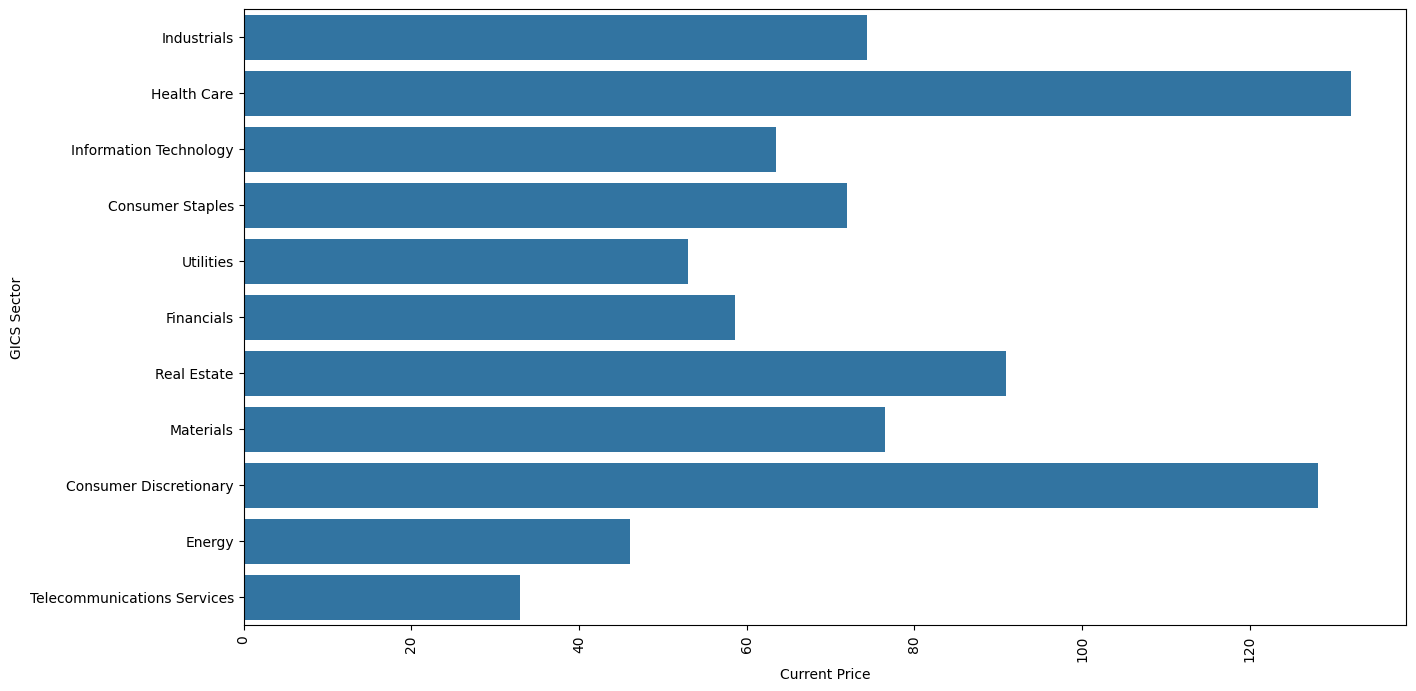

In [29]:
# Let's check the stocks of which economic sector have seen the maximum price on an average

plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Current Price', y='GICS Sector', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

The stock prices are the highest for Health Care and Consumer Discretionary

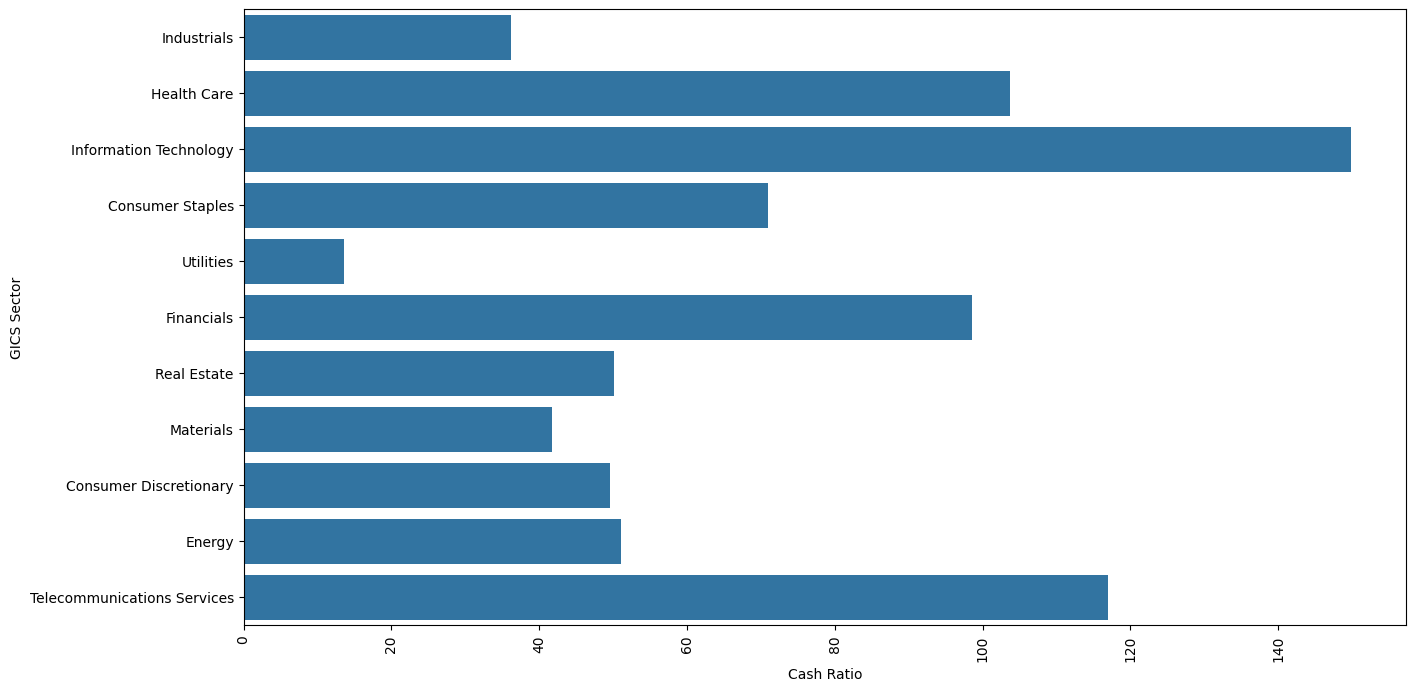

In [30]:
# Let's check how the company's average cash ratio varies for different economic sectors

plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Cash Ratio', y='GICS Sector', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

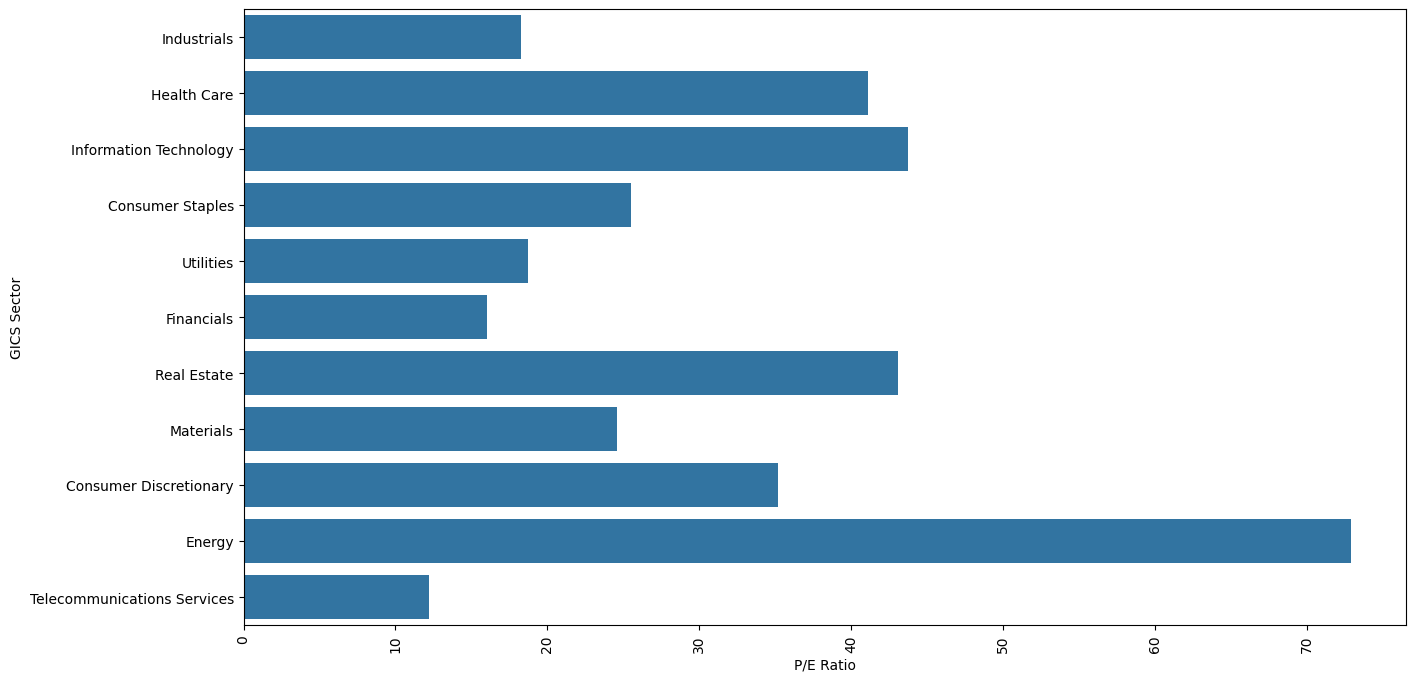

In [31]:
# Let's check how the company's P/E Ratio varies across economic sectors

plt.figure(figsize=(15,8))
sns.barplot(data=df, x='P/E Ratio', y='GICS Sector', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

In [32]:
#Let's check how stock prices are on an average for different economic sectors

df.groupby('GICS Sector')['Price Change'].mean().sort_values()

GICS Sector
Energy                        -10.228
Utilities                       0.804
Industrials                     2.833
Financials                      3.865
Materials                       5.590
Consumer Discretionary          5.846
Real Estate                     6.206
Telecommunications Services     6.957
Information Technology          7.217
Consumer Staples                8.685
Health Care                     9.586
Name: Price Change, dtype: float64

Stocks in Health Care sector have the highest prices on an average.

In [33]:
## Checking how the average cash ratio varies on an average for different economic sectors

df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values()

GICS Sector
Utilities                      13.625
Industrials                    36.189
Materials                      41.700
Consumer Discretionary         49.575
Real Estate                    50.111
Energy                         51.133
Consumer Staples               70.947
Financials                     98.592
Health Care                   103.775
Telecommunications Services   117.000
Information Technology        149.818
Name: Cash Ratio, dtype: float64

Cash Ratio for the Information Technology sector is the highest followed by Telecommunications Services and Health Care.

In [35]:
## Checking how the average P/E Ratio varies on an average for different economic sectors

df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values()

GICS Sector
Telecommunications Services   12.223
Financials                    16.023
Industrials                   18.259
Utilities                     18.719
Materials                     24.585
Consumer Staples              25.521
Consumer Discretionary        35.212
Health Care                   41.135
Real Estate                   43.066
Information Technology        43.783
Energy                        72.898
Name: P/E Ratio, dtype: float64

P/E Ratio is the highest on an average for Energy sector followed by IT and Real Estate.

## Data Preprocessing

### Scaling

In [43]:
num_col = ['Current Price','Price Change','Volatility','ROE','Cash Ratio','Net Cash Flow','Net Income','Earnings Per Share','Estimated Shares Outstanding','P/E Ratio','P/B Ratio']

In [44]:
## Scaling the dataset before performing clustering

scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [45]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-Means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1753218724712036
Number of Clusters: 5 	Average Distortion: 2.136105276092888
Number of Clusters: 6 	Average Distortion: 2.0832861128333096
Number of Clusters: 7 	Average Distortion: 2.0279171482165674
Number of Clusters: 8 	Average Distortion: 1.973036174639518


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

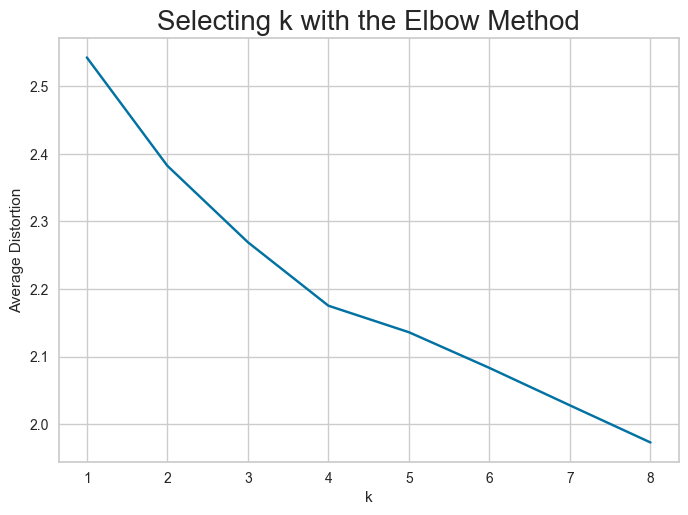

In [46]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

The appropriate value of K seems to be 4 from this

### Let's check the silhouette scores

For n_clusters = 2, silhouette score is 0.4484662124740991
For n_clusters = 3, silhouette score is 0.4576529285895266
For n_clusters = 4, silhouette score is 0.4498948196526947
For n_clusters = 5, silhouette score is 0.4143254956542406
For n_clusters = 6, silhouette score is 0.40036537812926176
For n_clusters = 7, silhouette score is 0.39397699902210176
For n_clusters = 8, silhouette score is 0.4122284874582936
For n_clusters = 9, silhouette score is 0.3624740878926171


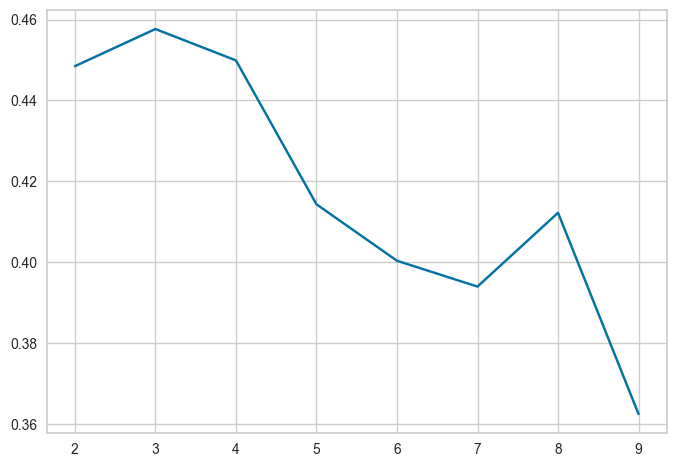

In [47]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

k=3 has the  maximum value from silhouette analysis. so we will fix the clusters at 3

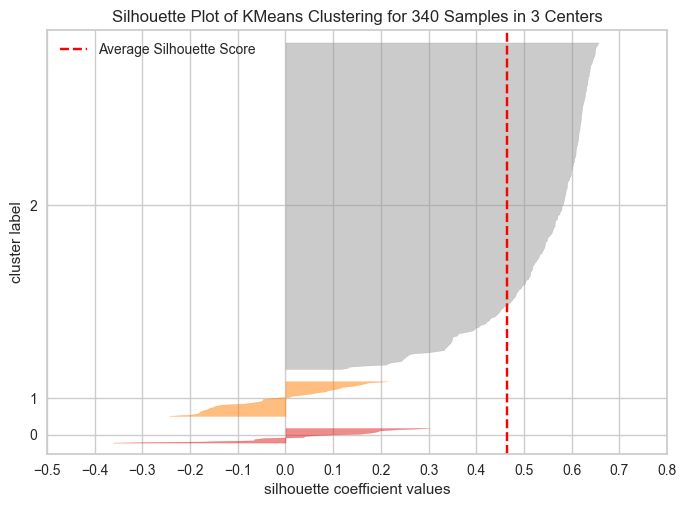

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

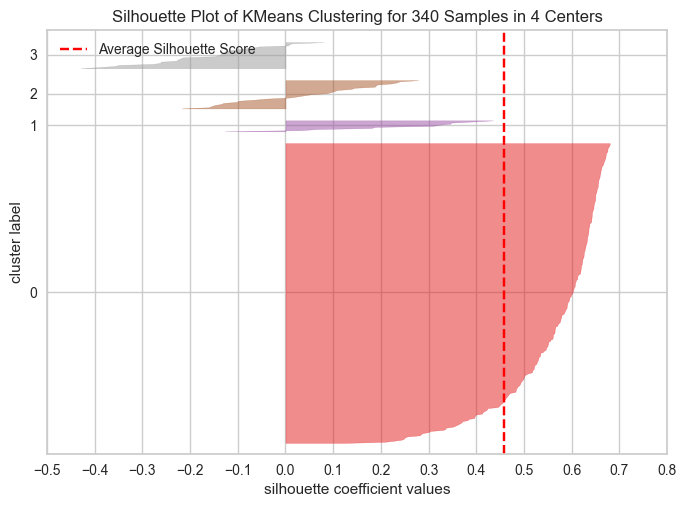

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

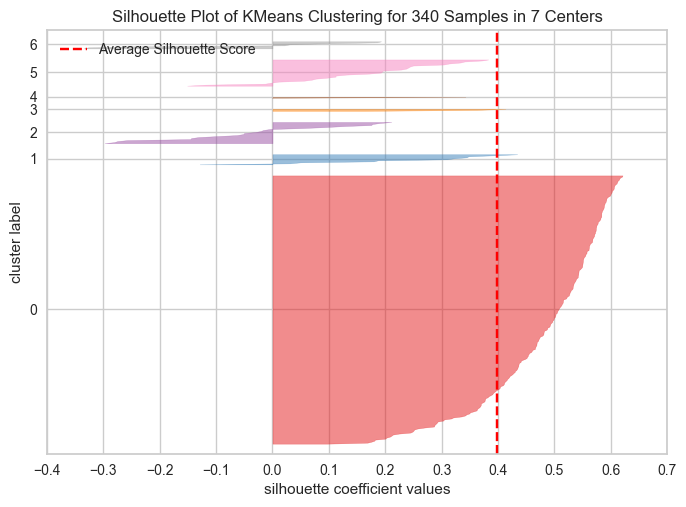

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

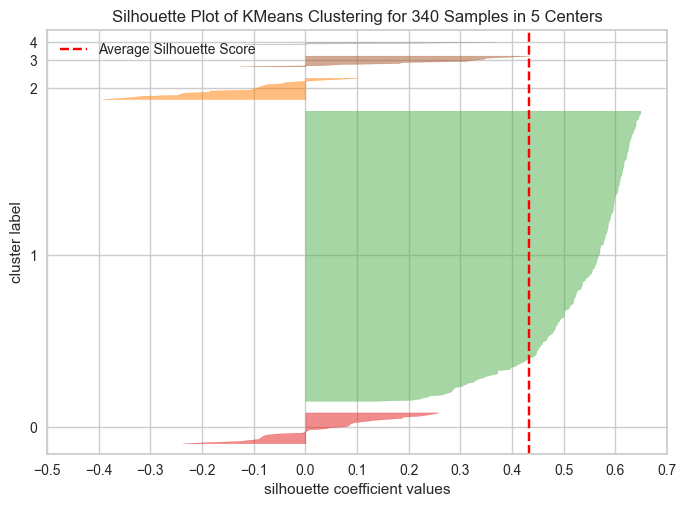

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

From looking at both elbow plot and silhouette scores , fixing a value of 5 for the clusters seem to give good results.

### Selecting the final model

In [52]:
## choosing 5 as the appropriate number of clusters since the silhouette score is high and there is a dip in the elbow
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [53]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [54]:
cluster_profile = df.groupby("K_means_segments").mean()

In [56]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Current Price"].count().values
)

In [57]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,246.574304,14.284326,1.769621,26.500000,279.916667,459120250.000000,1009205541.666667,6.167917,549432140.538333,90.097512,14.081386,24
1,41.373681,-14.849938,2.596790,27.285714,64.457143,34462657.142857,-1293864285.714286,-2.459714,450100420.905143,61.563930,2.476202,35
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
3,72.783335,0.912232,2.015435,542.666667,34.000000,-350866666.666667,-5843677777.777778,-14.735556,372500020.988889,53.574485,-8.831054,9
4,72.768128,5.701175,1.359857,25.598456,52.216216,-913081.081081,1537660934.362934,3.719247,436114647.527683,23.473934,-3.374716,259


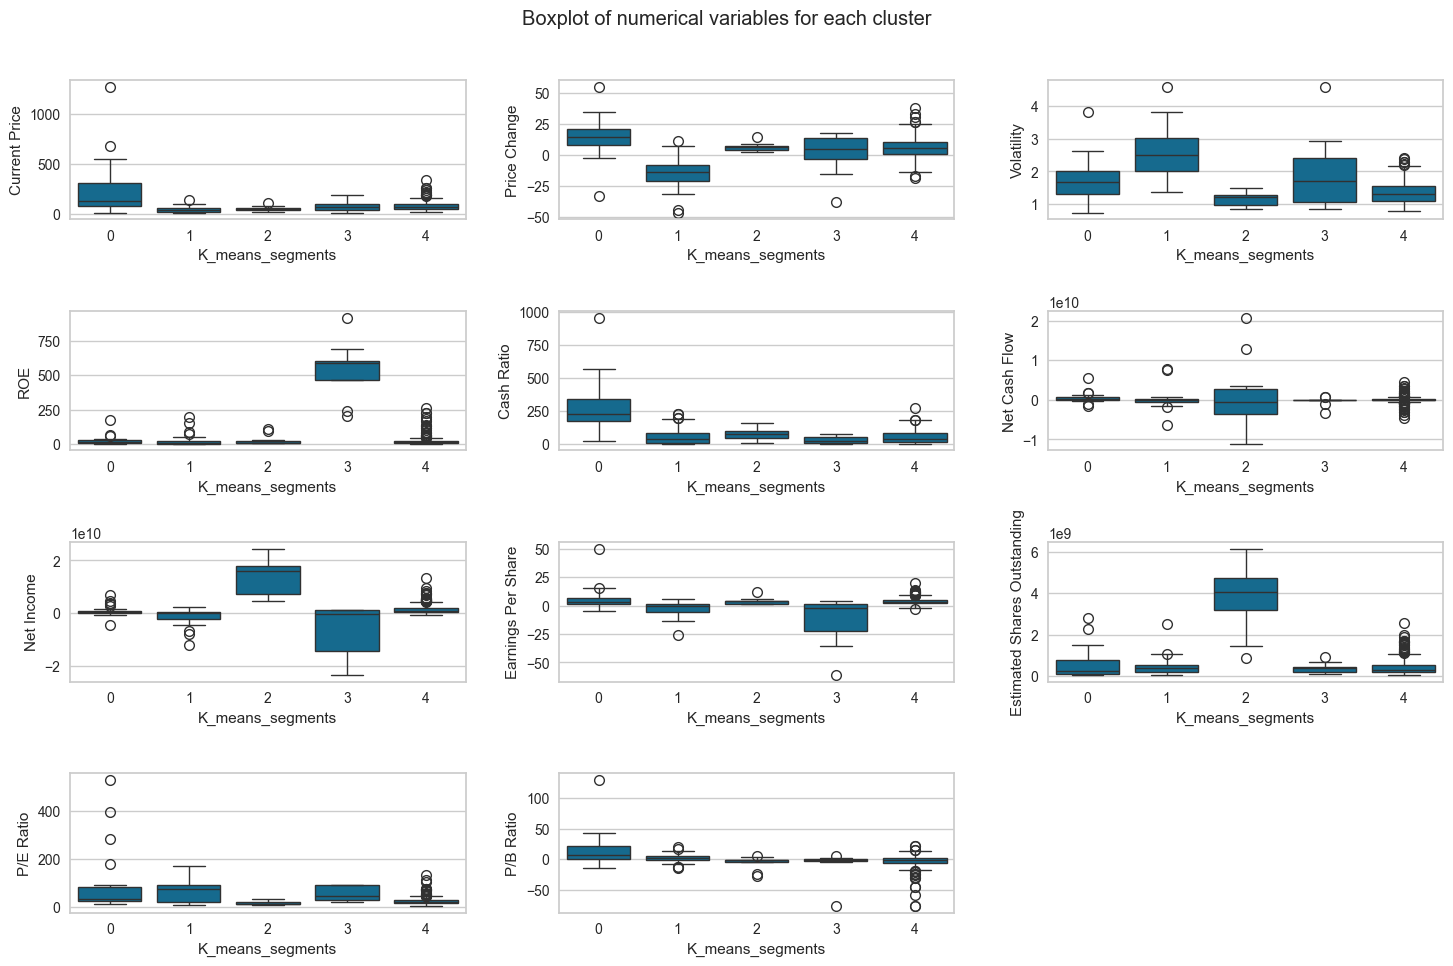

In [60]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_means_segments'>

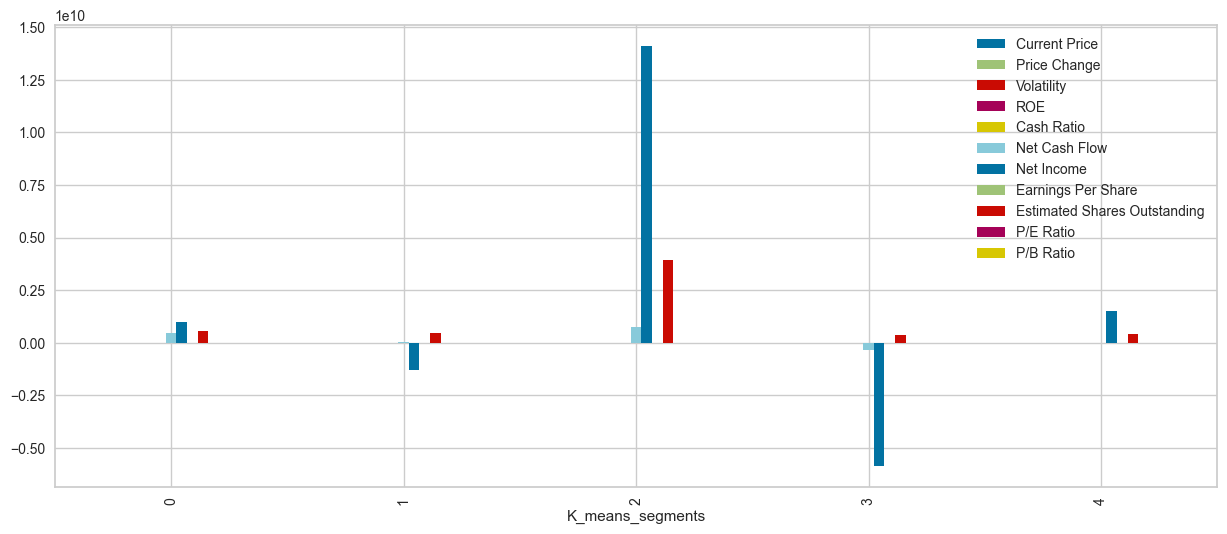

In [61]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

In [66]:
# print the names of the companies in each cluster
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(list(df[df["K_means_segments"] == cl]["Security"].unique()))
    print()

In cluster 4, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 'Caterpillar Inc.', 'Chubb Limited', 'CBRE Group', 'Crown Castle International Corp.',

In [67]:
#print number of stocks within each sector for all of the clusters
for k in range(0,df['K_means_segments'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(df[df['K_means_segments']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Health Care                    9
Information Technology         6
Consumer Discretionary         6
Real Estate                    1
Telecommunications Services    1
Consumer Staples               1
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Energy                    20
Materials                  5
Information Technology     4
Industrials                4
Financials                 1
Consumer Discretionary     1
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:
Financials                     4
Health Care                    3
Telecommunications Services    2
Consumer Discretionary         1
Information Technology         1
Consumer Staples               1
Energy                         1
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 3 are:
Energy                    4
Consu

Cluster 0 has 24 stocks present.
Most stocks in cluster 0 belong to the healthcare sector followed by Information Technology and Consumer Discretionary.
The stocks in this group seem to have a low net cash flow , moderate income and moderate profitability.

Cluster 1 - 
Seems to have very low current price and net income correspondingly.
Most stocks in cluster 1 seem to belong to the energy sector.

Cluster 2 - 
Most stocks belong to financials , health care and telecommunications services.
The stocks in cluster 2 seem to have a growth mindset with high stock prices , and a high net income , but also moderately high volatility, and a low net cash flow.

cluster 3 - there are 9 stocks in total. most stocks belong to energy and consumer staples

## Hierarchical Clustering

In [70]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

In [71]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


In [72]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [73]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

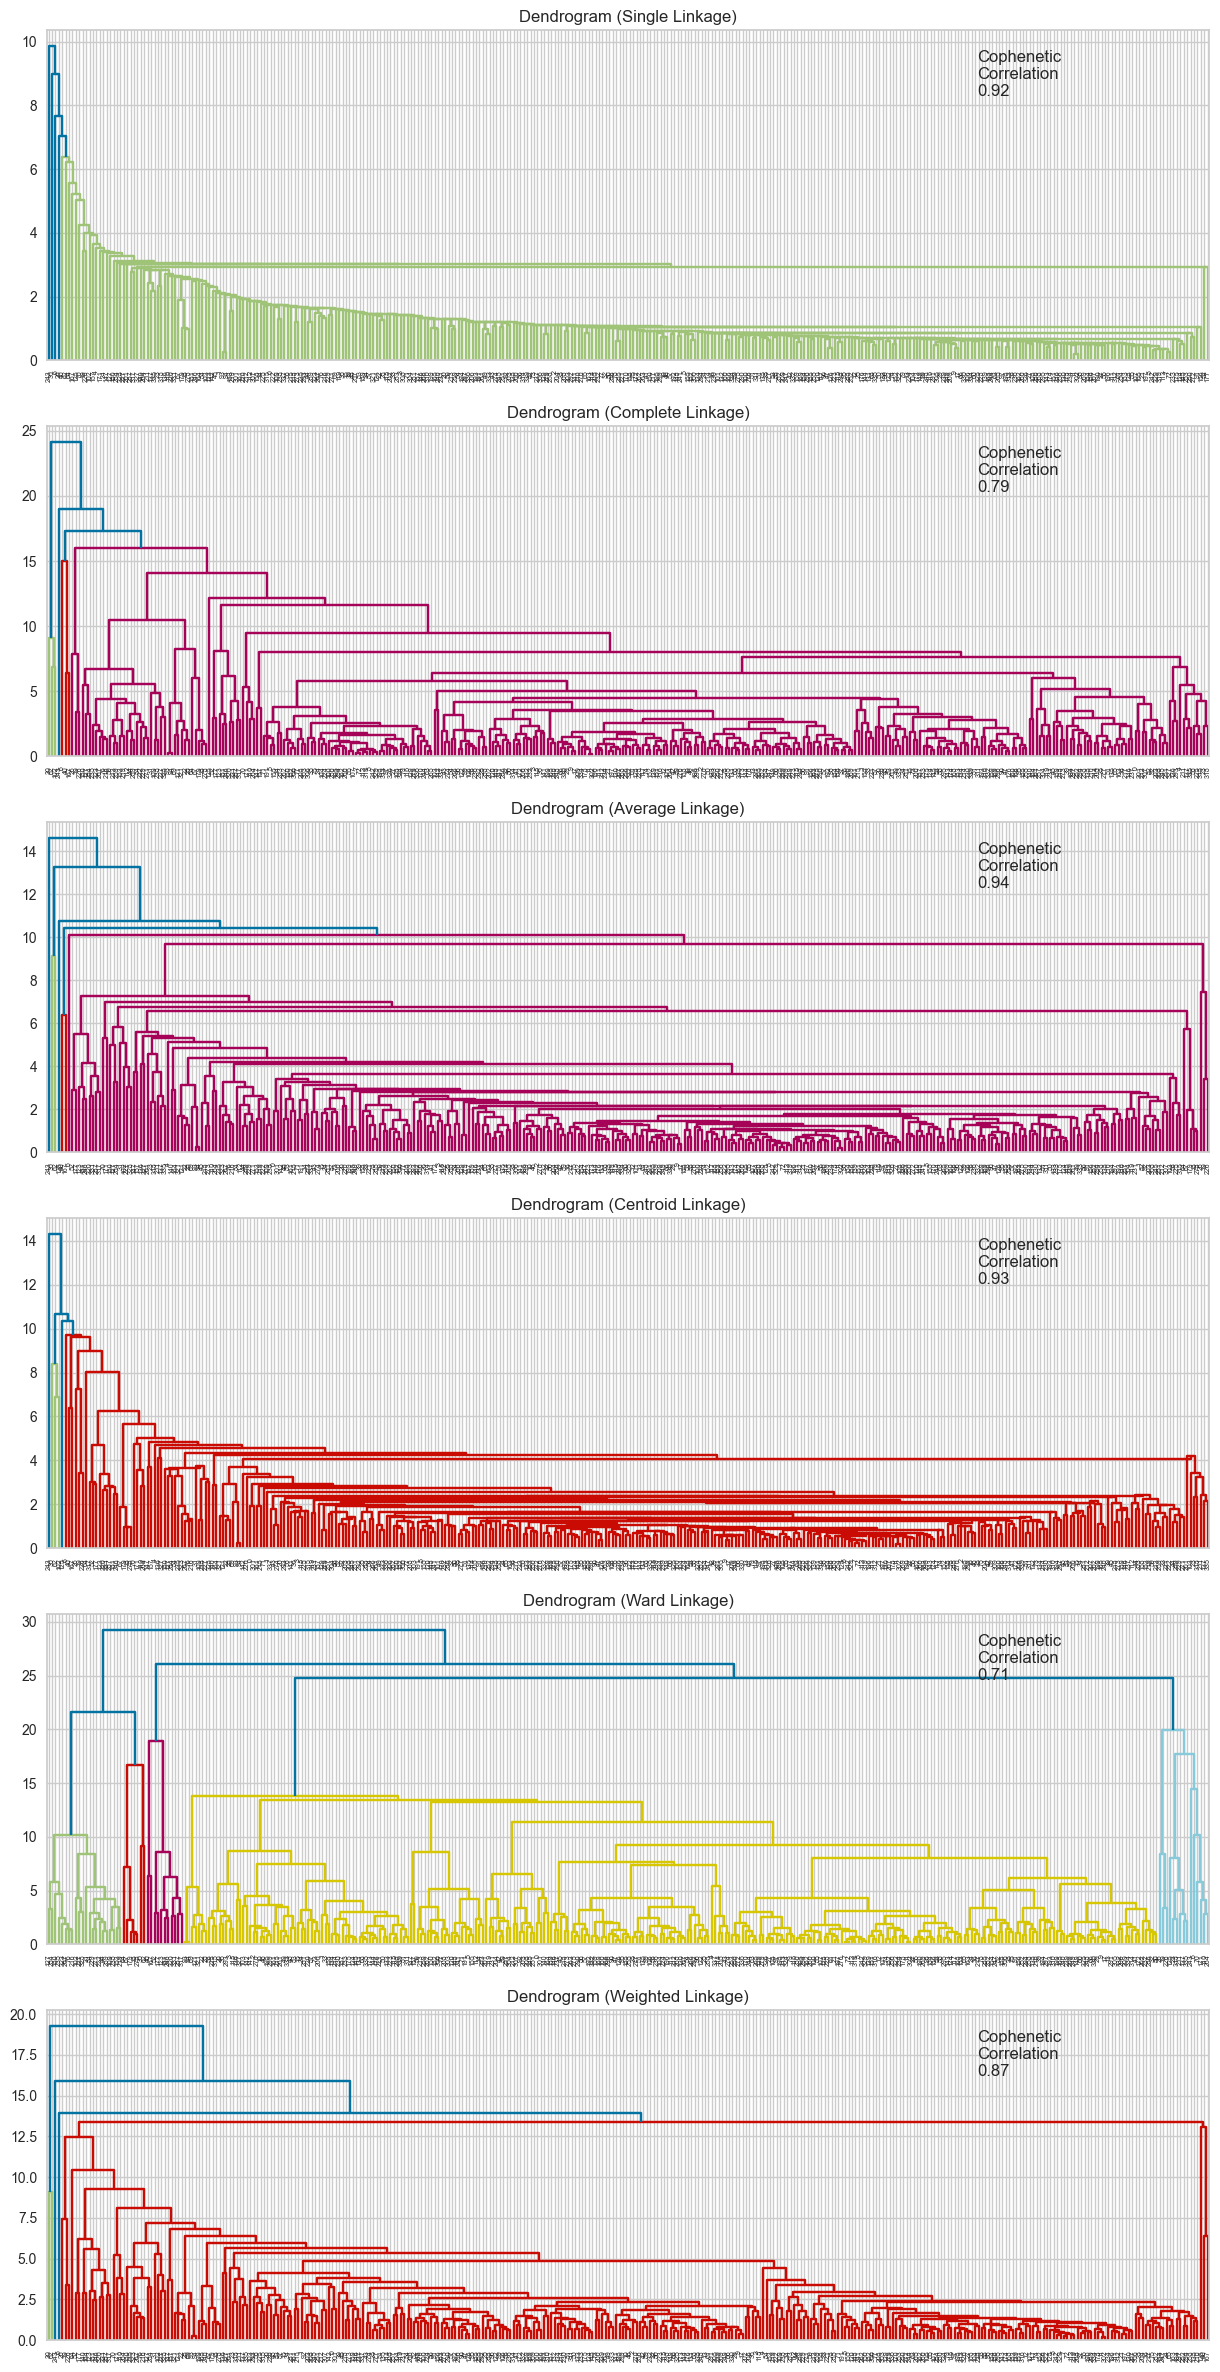

In [74]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

The cophenetic correlation is highest for average linkage method.
We will move ahead with average linkage.
5 seems to be the appropriate number of clusters from the dendrogram

### Creating model using sklearn

In [76]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [78]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [80]:
## cluster profile

cluster_profile = df.groupby("HC_Clusters").mean()

In [82]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Current Price"].count().values
)

In [84]:
# let's see the names of the securities in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following countries are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New Y

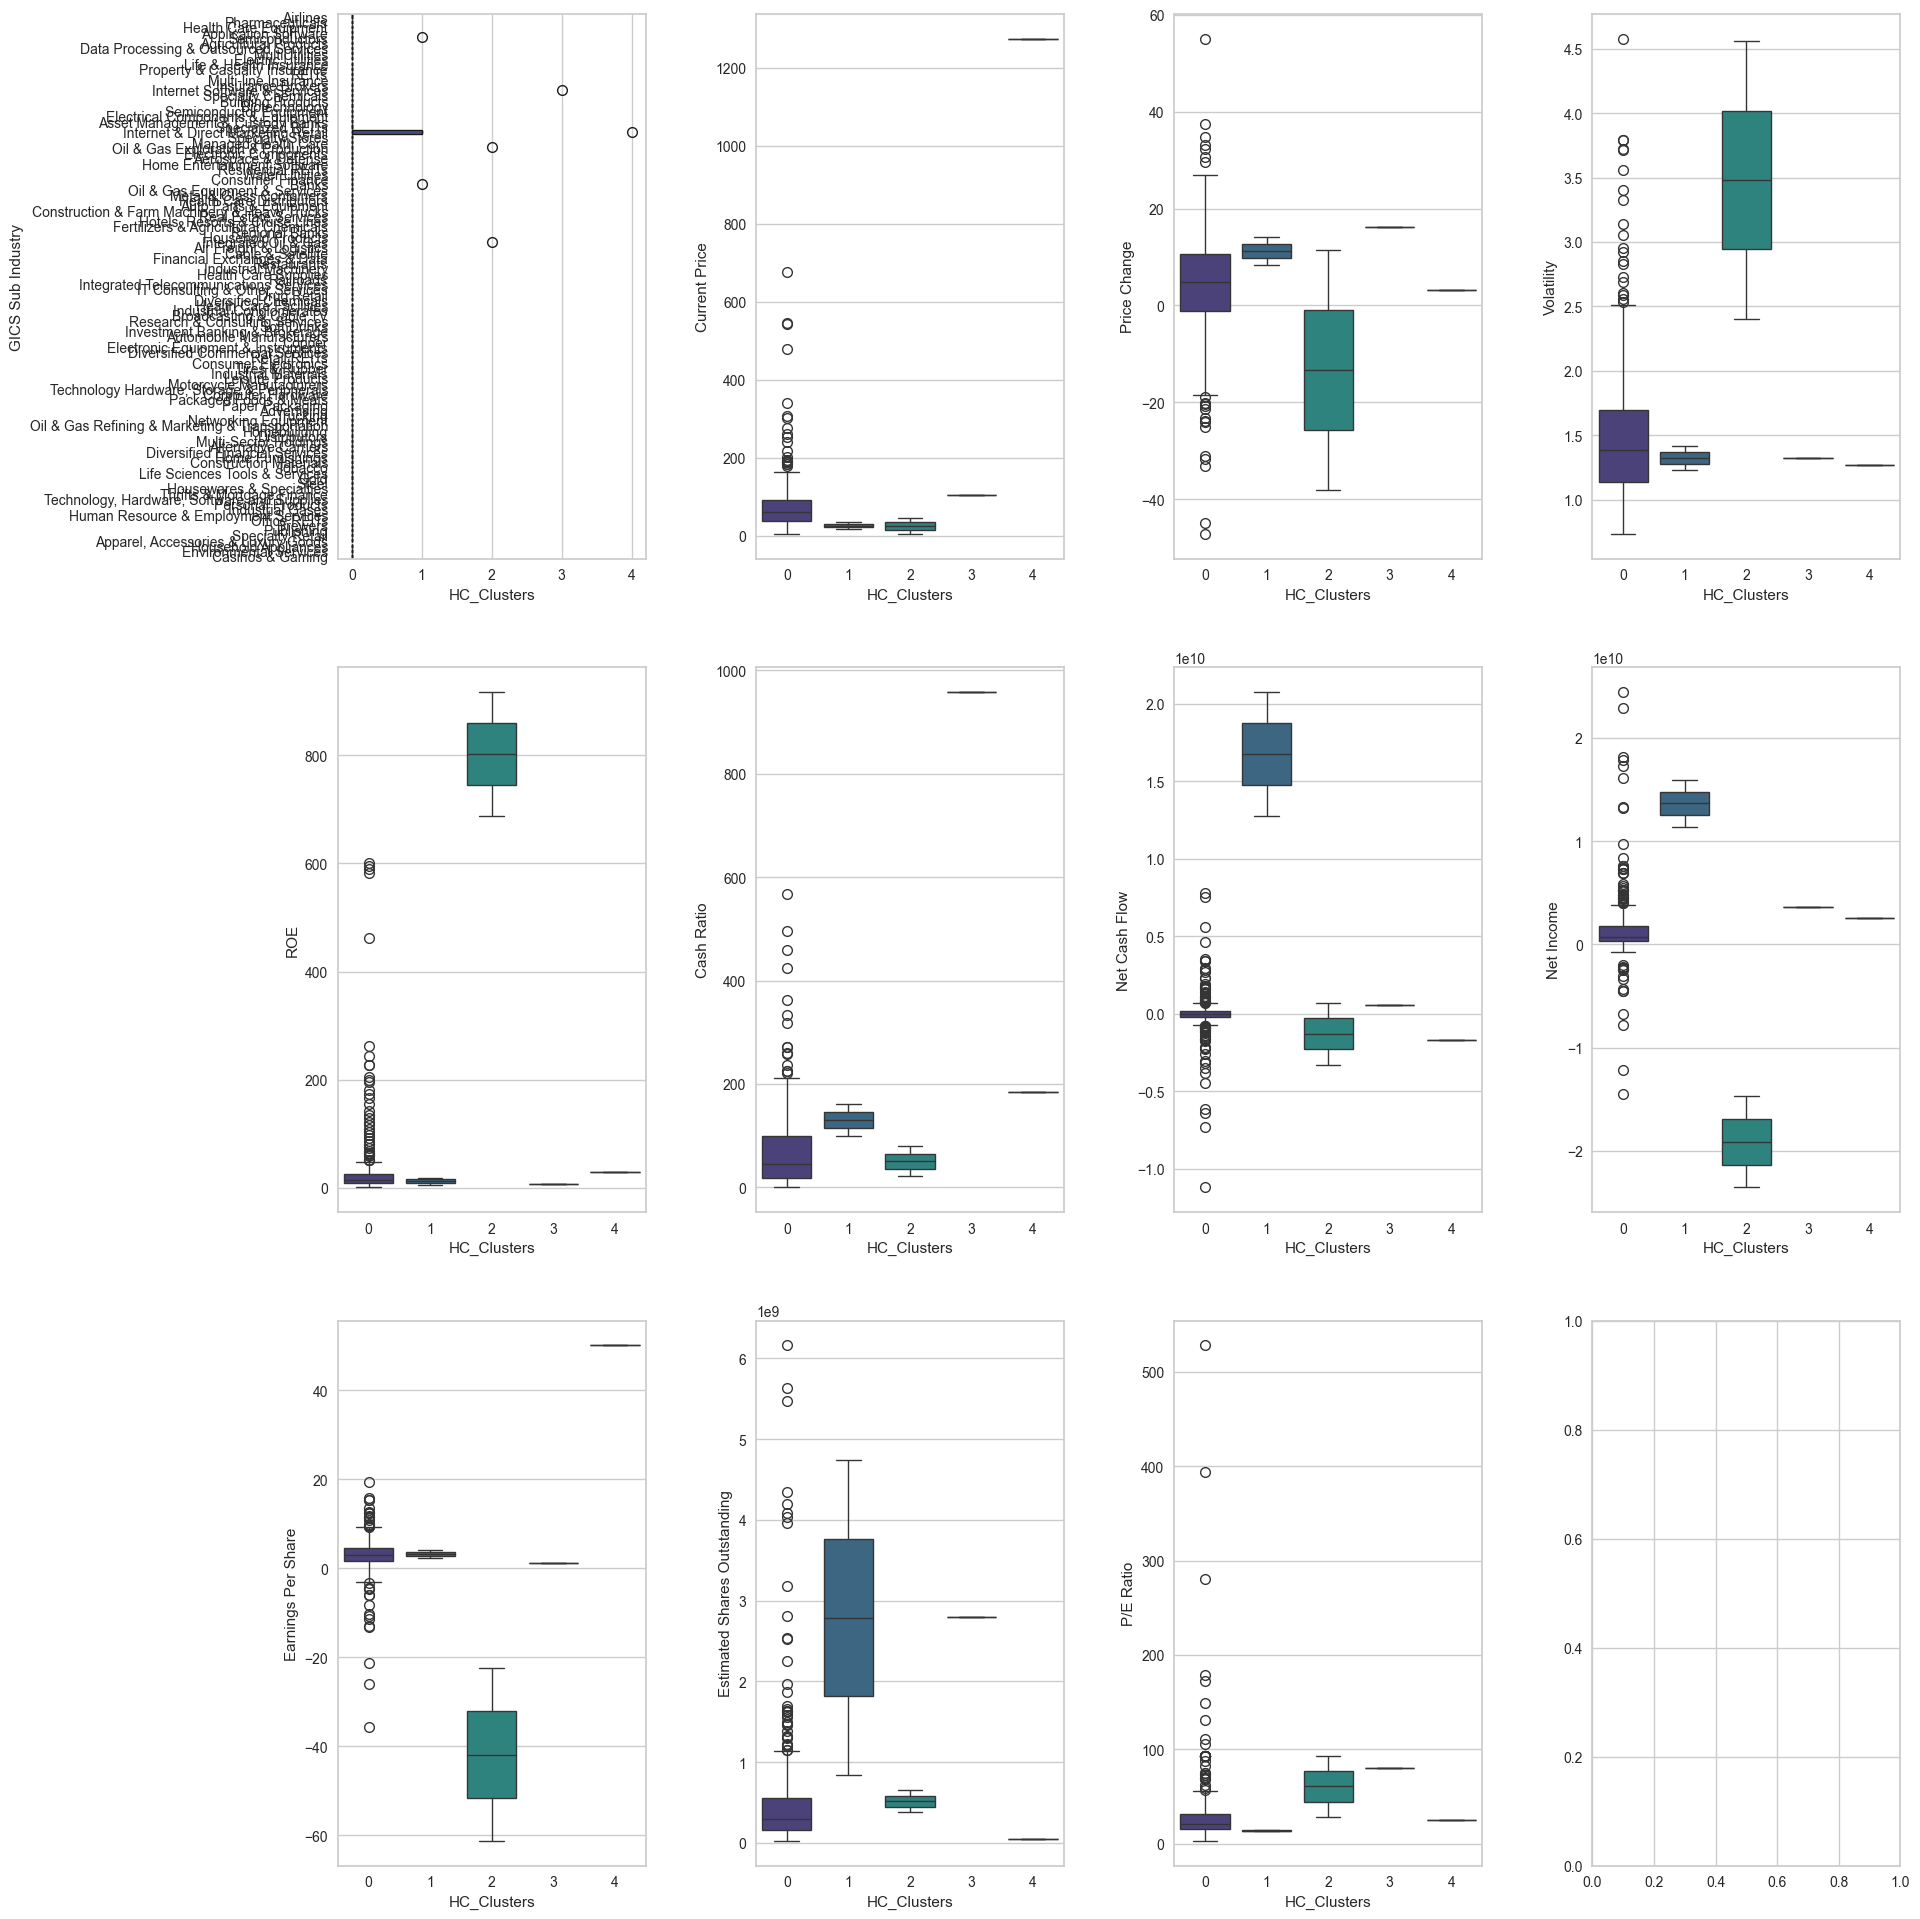

In [87]:
# show boxplots of numerical variables for each Hierarchical cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df,
                y=df.columns[3+counter],
                x="HC_Clusters",
                palette="viridis"
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

In [88]:
All clusters seem to have outliers.
Most securities seem to be within cluster 0 and the remaining 4 clusters have 2-3 stocks within them.
This seems to be a skewed clustering with just 2-3 stocks within 1 cluster

SyntaxError: invalid syntax (248998077.py, line 1)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

- Both the KMeans model and the Agglomerative Clustering model fit the dataset within ~0.1s
- Both algorithms give similar clusters, with a single cluster of a majority of the stocks and the remaining four clusters containing 7-29 stocks in the case of K-means abd 2-3 stocks with Hierarchical clustering. In this case , K-means seems to fit better the data.
- For both algorithms, 5 clusters provided distinct clusters with sufficient observations in each to reasonably differentiate which "type" of stock is representative of the cluster
- Both algorithms yielded similar clusters based on the outliers within the 11 variables

## Actionable Insights and Recommendations

Trade&Ahead should first identify the financial goals, risk tolerance, and investment behaviors of their clilents, then recommend a cluster as a potential portfolio of stocks which will fit these needs
However, many of these clusters, based on the characteristics of the stocks within them, are essentially substitutes for standard indexes, such as the Dow Jones Industrial Average and the S&P 500, which could more easily achieve these goals
Alternatively, Trade&Ahead could use these clusters as an starting point for further financial statement analysis, particularly which individual stocks do not fit the "profile" of the cluster
Assuming selecting individual stocks is a component of a client's investment strategy, Trade&Ahead may then be able to identify stocks which should outperform its peers (i.e., price will rise = buy recommendation) or likely fall behind its peers (i.e., price will fall = sell recommendation)